In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0,0,0),(1,1,1))   #三个颜色通道的平均值，三个颜色通道的标准差
     #transforms.Flip()  #旋转
    ]
)


#训练集
train = torchvision.datasets.CIFAR10(root='data',train=True,
                                    download=True,transform=transform) #root存储位置
trainloader = torch.utils.data.DataLoader(train, batch_size=4,
                                         shuffle=True,num_workers=2) #batch_size是mini-batch大小 
                                                                     #shuffle打乱顺序，避免输入顺序造成的影响
                                                                     #num_workers是线程数
    
#测试集
test = torchvision.datasets.CIFAR10(root='data',train=False,
                                   download=True,transform=transform)
testloader = torch.utils.data.DataLoader(train, batch_size=4,
                                         shuffle=False,num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


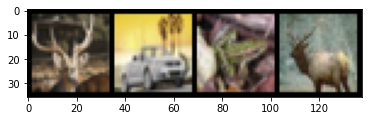

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    # 输入数据:torch.tensor[c,h,w]
    img = img#反归一化
    nping = img.numpy()
    nping = np.transpose(nping,(1,2,0)) # [h,w,c]
    plt.imshow(nping)
    
dataiter = iter(trainloader) #随机加载一个mini batch
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [17]:
class Net(nn.Module):
    def __init__(self): #定义神经网络结构, 输入数据 3x32x32
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(3*32*32, 512) #输入维度16x28x28=12544，输出维度 512
        self.fc2 = nn.Linear(512, 64) #输入维度512， 输出维度64
        self.fc3 = nn.Linear(64, 10) #输入维度64， 输出维度10
        
    def forward(self, x): #定义数据流向
        x = x.view(-1, 3*32*32)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        return x

In [18]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9) #lr学习速率

for epoch in range(2):
    for i,mini_batch in enumerate(trainloader):
        imgages, labels = mini_batch
        print(images.shape)
        out = net(imgages)
        print(out.shape)
        target = labels
        print(target.shape)
        loss = criterion(out,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i%1000 == 0):
            print("Epoch：%d, Step：%d, Loss：%.3f"%(epoch,i,loss.item()))
        break

torch.Size([4, 3, 32, 32])
torch.Size([4, 10])
torch.Size([4])
Epoch：0, Step：0, Loss：2.305
torch.Size([4, 3, 32, 32])
torch.Size([4, 10])
torch.Size([4])
Epoch：1, Step：0, Loss：2.265


In [8]:
correct = 0.0
total = 0.0

# 测试时不需要计算梯度
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = net(images)
        
        _,predicted = torch.max(outputs.data, 1)
        
        correct += (predicted==labels).sum()
        total += labels.size(0)
        
print("准确率:",float(correct)/total)

NameError: name 'net' is not defined

In [14]:
for data in testloader:
    images, labels = data
    outputs = net_2(images)
    print(outputs)
    print()
    print(torch.max(outputs.data, 1))
    print()
    print(labels)
    break

tensor([[ 0.0303, -0.4988,  0.8395,  0.4957,  1.6157,  0.5251,  1.7915,  0.5204,
         -2.4263, -1.9563],
        [ 1.8971,  3.6685, -0.7837, -1.2500, -1.3831, -1.0912, -2.9726, -0.5428,
          1.9501,  2.3518],
        [ 0.6343,  1.6955, -2.0851,  0.0747, -1.5551, -1.5817, -2.0592,  1.5709,
          0.7022,  4.8332],
        [-0.3003, -0.6134,  0.8929,  0.3214,  1.6473,  0.2331,  2.0248, -0.2413,
         -1.8365, -1.1340]], grad_fn=<AddmmBackward>)

torch.return_types.max(
values=tensor([1.7915, 3.6685, 4.8332, 2.0248]),
indices=tensor([6, 1, 9, 6]))

tensor([6, 9, 9, 4])


In [24]:
# 保存模型
torch.save(net.state_dict(),'./model.pt')

In [5]:
# 读取模型
net_2 = Net()
net_2.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>